In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import shutil
from google.colab import files


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import ndimage
from IPython.core.display import display, HTML
from collections import Counter
import random

In [2]:
df = pd.read_csv("/content/day1.csv", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,10875,10872,10869,10866,10863,10861,10858,10856,10853,10851,...,11023,11022,11020,11019,11017,11015,11013,11010,11009,11006
1,10892,10889,10885,10882,10879,10876,10873,10870,10868,10865,...,11041,11040,11038,11036,11034,11032,11029,11027,11024,11022
2,10907,10903,10900,10897,10894,10890,10887,10884,10881,10878,...,11059,11057,11055,11053,11051,11048,11046,11043,11040,11037
3,10920,10917,10913,10910,10907,10903,10900,10897,10894,10891,...,11081,11079,11076,11073,11071,11068,11065,11063,11059,11056
4,10930,10927,10924,10920,10917,10914,10911,10908,10905,10902,...,11102,11100,11099,11096,11093,11090,11086,11082,11079,11075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,12321,12314,12307,12303,12303,12305,12310,12318,12326,12335,...,12353,12350,12346,12341,12337,12334,12330,12327,12324,12321
70,12325,12318,12312,12307,12308,12310,12315,12324,12334,12343,...,12362,12359,12356,12352,12348,12345,12342,12339,12336,12333
71,12332,12325,12319,12315,12316,12318,12323,12332,12342,12352,...,12369,12366,12363,12360,12357,12354,12351,12348,12345,12343
72,12340,12334,12327,12324,12325,12328,12334,12342,12351,12360,...,12372,12371,12368,12366,12363,12360,12357,12354,12352,12350


In [3]:
min = math.floor(df.min().min()/100) * 100
max = math.ceil(df.max().max()/100) * 100

cls = (max - min)/100
cls

def get_cluster(num):
    return (num - min) // 100

df_clusters= df.applymap(get_cluster)

cluster = np.array(df_clusters).reshape(-1,1)
colors = np.arange(1, cls + 1).reshape(-1, 1)

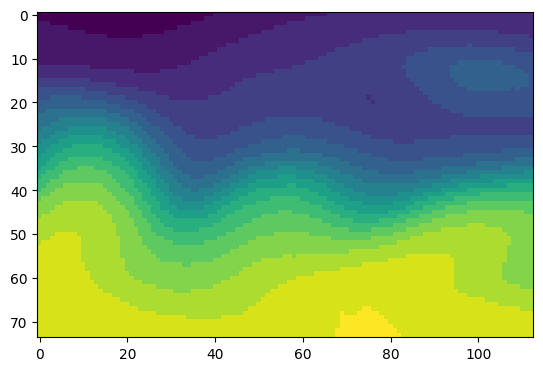

In [4]:
pressure_img = colors[cluster].reshape(df_clusters.shape)
plt.imshow(pressure_img)
plt.show()

In [5]:
label = np.array(df_clusters)
for i in range(0, len(label)):
    for j in range(0, len(label[0])):
        label[i][j] += 1
# print(label)

In [6]:
# matrix_str = '<br>'.join(['&nbsp;&nbsp;'.join(map(str, row)) for row in label])
# display(HTML(f'<div style="max-height: 300px; overflow-x: scroll; white-space: nowrap; border: 1px solid;">{matrix_str}</div>'))

In [7]:
label_copy = label.copy()
for i in range(1, len(label)-1):
    for j in range(1, len(label[0])-1):
        curr_val = label[i][j]
        neighbors = [
            label[i - 1][j - 1], label[i - 1][j], label[i - 1][j + 1],
            label[i][j - 1], label[i][j + 1],
            label[i + 1][j - 1], label[i + 1][j], label[i + 1][j + 1]
        ]

        # Count neighbors with different values
        count_diff = sum([1 for value in neighbors if value != curr_val])

        # If at least 3 neighbors have different values, negate the current value
        if count_diff >= 3:
            label_copy[i][j] = -curr_val


label_copy[label_copy > 0] = 0
label_copy = np.abs(label_copy)
print(label_copy)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 2 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


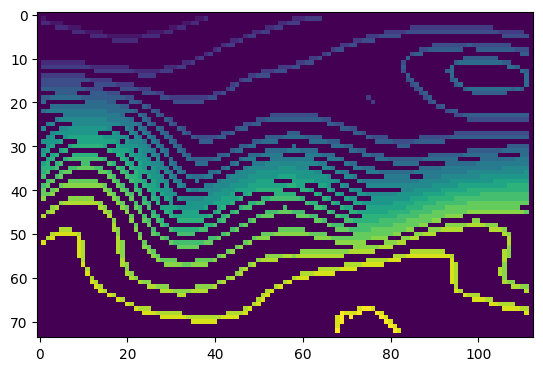

In [8]:
n_colors = np.arange(1, cls + 2).reshape(-1, 1)
img = n_colors[label_copy].reshape(df_clusters.shape)
plt.imshow(img)
plt.show()

In [9]:
for i in range(len(label_copy)):
    for j in range(len(label_copy[0])):
        if label_copy[i][j] != 0:
            if label_copy[i][j] == label_copy[i+1][j] and label_copy[i][j] == label_copy[i][j+1]:
                label_copy[i][j] = 0

In [10]:
for i in range(len(label_copy[0])):
    if label_copy[1][i] != 0:
        label_copy[0][i] = label_copy[1][i]
    if label_copy[len(label_copy)-2][i] != 0:
        label_copy[len(label_copy)-1][i] = label_copy[len(label_copy)-2][i]


for i in range(len(label_copy)):
    if label_copy[i][1] != 0:
        label_copy[i][0] = label_copy[i][1]
    if label_copy[i][len(label_copy[0])-2] != 0:
        label_copy[i][len(label_copy[0])-1] = label_copy[i][len(label_copy[0])-2]



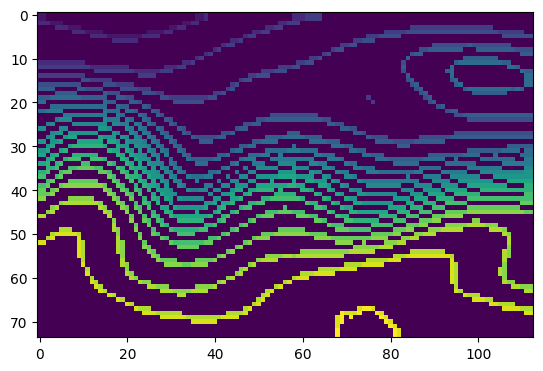

In [11]:
nn_colors = np.arange(1, cls + 2).reshape(-1, 1)
nimg = nn_colors[label_copy].reshape(df_clusters.shape)
plt.imshow(nimg)
plt.show()

In [12]:
for i in range(0, len(label_copy)-1):
    for j in range(len(label_copy[0])):
        if label_copy[i][j] != 0 and label_copy[i+1][j] != 0:
            label_copy[i][j] = label_copy[i+1][j]

In [13]:
for i in range(len(label_copy)):
    for j in range(0, len(label_copy[0])-1):
        if label_copy[i][j] != 0 and label_copy[i][j+1] != 0:
            label_copy[i][j] = label_copy[i][j+1]

In [14]:
for i in range(1, len(label_copy)-1):
    for j in range(1, len(label_copy[0])-1):
        if label_copy[i][j] != 0:
            neighbors = [
                label_copy[i - 1][j - 1], label_copy[i - 1][j], label_copy[i - 1][j + 1],
                label_copy[i][j - 1], label_copy[i][j + 1],
                label_copy[i + 1][j - 1], label_copy[i + 1][j], label_copy[i + 1][j + 1]
            ]


            # Using Counter to get frequencies of the neighbors and filtering out zeros
            count = Counter([x for x in neighbors if x != 0])

            # If there are non-zero neighbors, set label[i][j] to the most common one
            if count:
                label_copy[i][j] = count.most_common(1)[0][0]


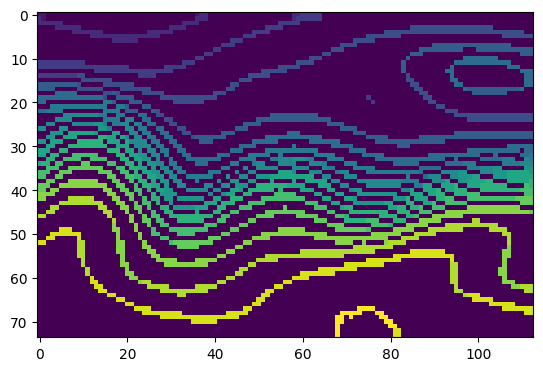

In [15]:
nn_colors = np.arange(1, cls + 2).reshape(-1, 1)
nimg = nn_colors[label_copy].reshape(df_clusters.shape)
plt.imshow(nimg)
plt.show()

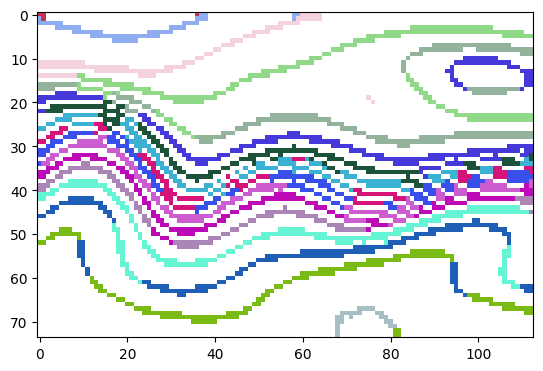

In [16]:
def generate_unique_color(existing_colors):
    """Generate a unique random color not in existing_colors."""
    while True:
        color = (random.random(), random.random(), random.random())
        if color not in existing_colors:
            return color

# Convert the list to numpy array
matrix = np.array(label_copy)

# Get the unique non-zero values
unique_values = np.unique(matrix)
unique_values = unique_values[unique_values != 0]  # Remove 0

# Generate a unique color for each non-zero value
color_map = {0: (1, 1, 1)}  # Initially set 0 to white
for value in unique_values:
    color_map[value] = generate_unique_color(color_map.values())

# Create a new matrix to store the colors
color_matrix = np.zeros(matrix.shape + (3,), dtype=float)

# Fill the new matrix with the corresponding colors
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        color_matrix[i, j] = color_map[matrix[i, j]]

# Display the resulting image
plt.imshow(color_matrix)
# plt.axis('off')  # Turn off axis
plt.show()

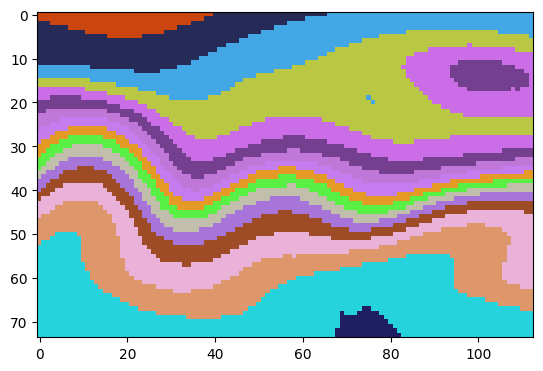

In [17]:
# Convert the list to numpy array
matrix = np.array(label)

# Get the unique non-zero values
unique_values = np.unique(matrix)
unique_values = unique_values[unique_values != 0]  # Remove 0

# Generate a unique color for each non-zero value
color_map = {0: (1, 1, 1)}  # Initially set 0 to white
for value in unique_values:
    color_map[value] = generate_unique_color(color_map.values())

# Create a new matrix to store the colors
color_matrix = np.zeros(matrix.shape + (3,), dtype=float)

# Fill the new matrix with the corresponding colors
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        color_matrix[i, j] = color_map[matrix[i, j]]

# Display the resulting image
plt.imshow(color_matrix)
# plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
# nlabel_copy = label_copy.copy()
# for i in range(1, len(nlabel_copy)-1):
#     for j in range(1, len(nlabel_copy[0])-1):
#         neighbors = [
#             nlabel_copy[i - 1][j - 1], nlabel_copy[i - 1][j], nlabel_copy[i - 1][j + 1],
#             nlabel_copy[i][j - 1], nlabel_copy[i][j + 1],
#             nlabel_copy[i + 1][j - 1], nlabel_copy[i + 1][j], nlabel_copy[i + 1][j + 1]
#         ]

#         # Count neighbors with different values
#         count_diff = sum([1 for value in neighbors if value != 0])

#         # If at least 3 neighbors have different values, negate the current value
#         if count_diff >= 6:
#             nlabel_copy[i][j] = 0

In [ ]:
# for i in range(len(nlabel_copy[0])):
#     if nlabel_copy[1][i] == 0:
#         nlabel_copy[0][i] = nlabel_copy[1][i]
#     if nlabel_copy[len(nlabel_copy)-2][i] == 0:
#         nlabel_copy[len(nlabel_copy)-1][i] = nlabel_copy[len(nlabel_copy)-2][i]


# for i in range(len(nlabel_copy)):
#     if nlabel_copy[i][1] == 0:
#         nlabel_copy[i][0] = nlabel_copy[i][1]
#     if nlabel_copy[i][len(nlabel_copy[0])-2] == 0:
#         nlabel_copy[i][len(nlabel_copy[0])-1] = nlabel_copy[i][len(nlabel_copy[0])-2]



In [ ]:

# nnimg = nn_colors[label_copy].reshape(df_clusters.shape)
# plt.imshow(nnimg)
# plt.show()

# print(nnimg.shape)